# Problem statement


Previosuly, in the notebook Linear Regression using Skicit Learn.ipynb we used the data from ISLR, which shows the sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media to find the relationship between each advertising channel (TV,Radio,Newspaper) and sales. Also using the linear model we found the sales for  USD 150000 for TV, USD 380000 for radio and USD 20000 for newspaper.

For the current problem statement, instead of using a degree of 1, we will use higher degree polynomial for the features to run the linear regression model and find out which degree is apt for our dataset. Also we will find the sales for  USD 150000 for TV, USD 380000 for radio and USD 20000 for newspaper using the higher degree model.

In [1]:
#import the required modules/libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataframe from the csv file
df = pd.read_csv("Advertising.csv")

In [6]:
#check the first few rows of the dataframe
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
#getting the features matrix 'X'
X = df.drop('sales', axis = 1)

In [5]:
#getting the target matrix 'y'
y= df['sales']

### Transforming and Fitting the current features of the dataset for higher degree polynomials

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
#creating an instance of Polynomial Features
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [23]:
poly_features = polynomial_converter.transform(X)
print(poly_features, poly_features.shape)
#we note the shape of the transformed matrix is 9. This includes X1, X2, X3,  X1X2, X1X2, X2X3, X1^2, X2^2, X3^2. Since we kept include_bias = False, we did not get the additional column having 1's.

[[ 230.1    37.8    69.2  ... 1428.84 2615.76 4788.64]
 [  44.5    39.3    45.1  ... 1544.49 1772.43 2034.01]
 [  17.2    45.9    69.3  ... 2106.81 3180.87 4802.49]
 ...
 [ 177.      9.3     6.4  ...   86.49   59.52   40.96]
 [ 283.6    42.     66.2  ... 1764.   2780.4  4382.44]
 [ 232.1     8.6     8.7  ...   73.96   74.82   75.69]] (200, 9)


### Train | Test Split using Skicit Learn

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
 X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=101)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
#creating an instance of the LinearRegression
model = LinearRegression()

In [28]:
#training the model on the 9 features
model.fit(X_train, y_train)

LinearRegression()

In [34]:
test_predictions = model.predict(X_test)

### Calculate Performance on Test Set using Metrics

We use the below metrics for performance evaluation for our regression model:
Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
 
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
 

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [35]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [36]:
y_mean = np.mean(df['sales'])
print('y_mean, MAE, RMSE: ', y_mean, MAE, RMSE)
print(f'Percetage MAE:  {round((MAE/y_mean)*100,0)} %')
print(f'Percetage RMSE:  {round((RMSE/y_mean)*100,0)} %')

y_mean, MAE, RMSE:  14.022500000000003 0.48967980448038056 0.664643175726924
Percetage MAE:  3.0 %
Percetage RMSE:  5.0 %


### Plotting residuals

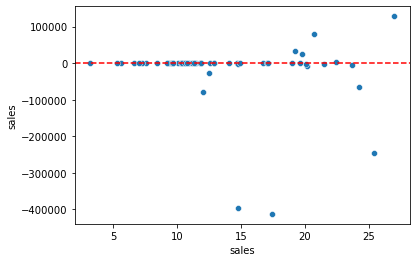

In [79]:
#plotting the residual errors vs y_test
test_residuals = y_test - test_predictions
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', linestyle='--')


The residual plot follows a random distribution around the zero residual line, thus we can say that linear regression model (with polynomial degree of 2) is apt for our dataset. In case the distribution of our residuals were ordered, linear regression model used by us here would not have been a correct choice.

<b>Will including the parameter include_bias cause any difference?</b>

In [48]:
polynomial_converter_include_bias = PolynomialFeatures(degree=2, include_bias=True)
poly_features = polynomial_converter_include_bias.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=101)
model = LinearRegression()
model.fit(X_train, y_train)
test_predictions_new = model.predict(X_test)
MAE_new = mean_absolute_error(y_test,test_predictions_new)
MSE_new = mean_squared_error(y_test,test_predictions_new)
RMSE_new = np.sqrt(MSE_new)

In [53]:
y_mean = np.mean(df['sales'])
print('y_mean, MAE_include_bias, RMSE_include_bias: ', y_mean, MAE_new, RMSE_new)
print(f'Percetage MAE:  {round((MAE_new/y_mean)*100,0)} %')
print(f'Percetage RMSE:  {round((RMSE_new/y_mean)*100,0)} %')

y_mean, MAE_include_bias, RMSE_include_bias:  14.022500000000003 0.4896798044804092 0.6646431757269586
Percetage MAE:  3.0 %
Percetage RMSE:  5.0 %


Thus for our current dataset, including the pararmeter "include_bias=True" shows no difference and thus we will skip it for future calculations.

<b> From the Linear Regression using skicit Learn.ipynb using linear coefficients (degree as one), we saw that the accuracy metrics were as below:</b>


In [37]:
MAE_old = 1.2137457736144805 
RMSE_old = 1.5161519375993877

In [43]:
print(f'Percentage decrease in MAE is {round((MAE_old-MAE)/MAE_old *100,2)}%')
print(f'Percentage decrease in RMSE is {round((RMSE_old-RMSE)/RMSE_old *100,2)}%')

Percentage decrease in MAE is 59.66%
Percentage decrease in RMSE is 56.16%


Thus, using a second degree polynomial for our regression model helped us reduce the errors.

### Does that mean increasing the feature degree in Regression leads to lesser errors? Let's check out!

In [46]:
#initialising empty arrays for test and train data for MAE and RMSE
train_rmse_errors = []
test_rmse_errors = []
train_mae_errors = []
test_mae_errors = []

#testing till degree of 20 for rmse

for i in range(1,20):
    
    polynomial_converter = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_predictions))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    
#testing till degree of 20 for mae

for i in range(1,20):
    
    polynomial_converter = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    train_mae = np.sqrt(mean_absolute_error(y_train,train_predictions))
    test_mae = np.sqrt(mean_absolute_error(y_test,test_predictions))
    
    train_mae_errors.append(train_mae)
    test_mae_errors.append(test_mae)    

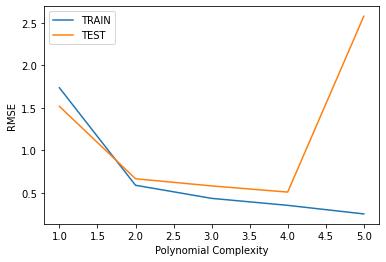

In [61]:
#visualizing if increasing the polynomial degree is beneficial for our dataset. Plotting all 20 values is not visually appealing so we go with 5 values only.
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()
plt.show()

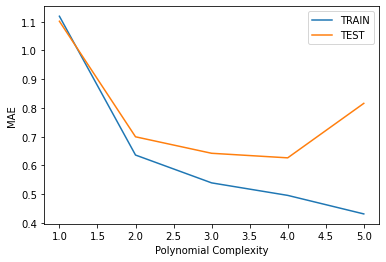

In [67]:
#visualizing if increasing the polynomial degree is beneficial for our dataset. Plotting all 20 values is not visually appealing so we go with 5 values only.
plt.plot(range(1,6),train_mae_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_mae_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("MAE")
plt.legend()
plt.show()

<b>Inference from above graphs:</b>

It is thus evident that for the test data, increasing the degree of polynomial is decreasing the errors (both RMSE and MAE). Howeever, for the training data we see that after the degree of four, the errors shoot up. This shows that the model is overfitting our dataset for polynomial degrees greater than four and such values should be avoided.

For our dataset, a polynomial degree of four gives the minimum errors, but it comes with an added complexity. 

### Saving model for future use

In [68]:
# Based on our chart, could have also been degree=4, but we select a degree of 3 to avoid complexity
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)
final_model = LinearRegression()
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

In [72]:
#saving the model and converter
from joblib import dump, load
dump(final_model, 'polynomial_reg_using_skicitlearn_model.joblib') 
dump(final_poly_converter,'polynomial_reg_using_skicitlearn_converter.joblib')

['polynomial_reg_using_skicitlearn_converter.joblib']

### Prediction on New Data

As per the question, we need to estimate the increase in the units of sales with spending 150k for TV, 380k for Radio and 20k for Newspaper and compare the sales when we used a linear degree to get the output.

In [70]:
new_spends = [[149,22,12]]

In [73]:
loaded_poly = load('polynomial_reg_using_skicitlearn_converter.joblib')
loaded_model = load('polynomial_reg_using_skicitlearn_model.joblib')

In [75]:
new_spends_poly = loaded_poly.transform(new_spends)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [78]:
print(f"By spending 150k for TV, 380k for Radio and 20k for Newspaper, we can expect to sell {round(final_model.predict(new_spends_poly)[0]*1000,0)} units.")

By spending 150k for TV, 380k for Radio and 20k for Newspaper, we can expect to sell 14645.0 units.


<b>Thus, as opposed to 13893 sale units which we got from using a polynomial degree of 1, we expect to sell 14645 sale units using a model with polynomial degree of 3. </b>